### Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import joblib

### load the training dataset

In [2]:
data = pd.read_excel(r"C:\Users\rokay\Azure\Regression\real_estate.xlsx")
data.head()

,No,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

### Checking Statistics

In [3]:
data = data.drop('No', axis = 1)
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Transaction Date: Transactions span from mid-2012 to mid-2013, with an average around early 2013.

House Age: Houses range from new to 43.8 years old, with an average age of 17.7 years.

Transit Distance: Distance to nearest transit varies widely, averaging 1084 meters.

Local Convenience Stores: Properties have up to 10 nearby stores, averaging around 4.

Latitude and Longitude: Locations center around 24.97°N, 121.53°E, indicating a specific geographic region.

Price Per Unit: Prices vary significantly, from 7.6 to 117.5 units, averaging around 38 units.

### Visualizing and understanding the data

### View the label distribution

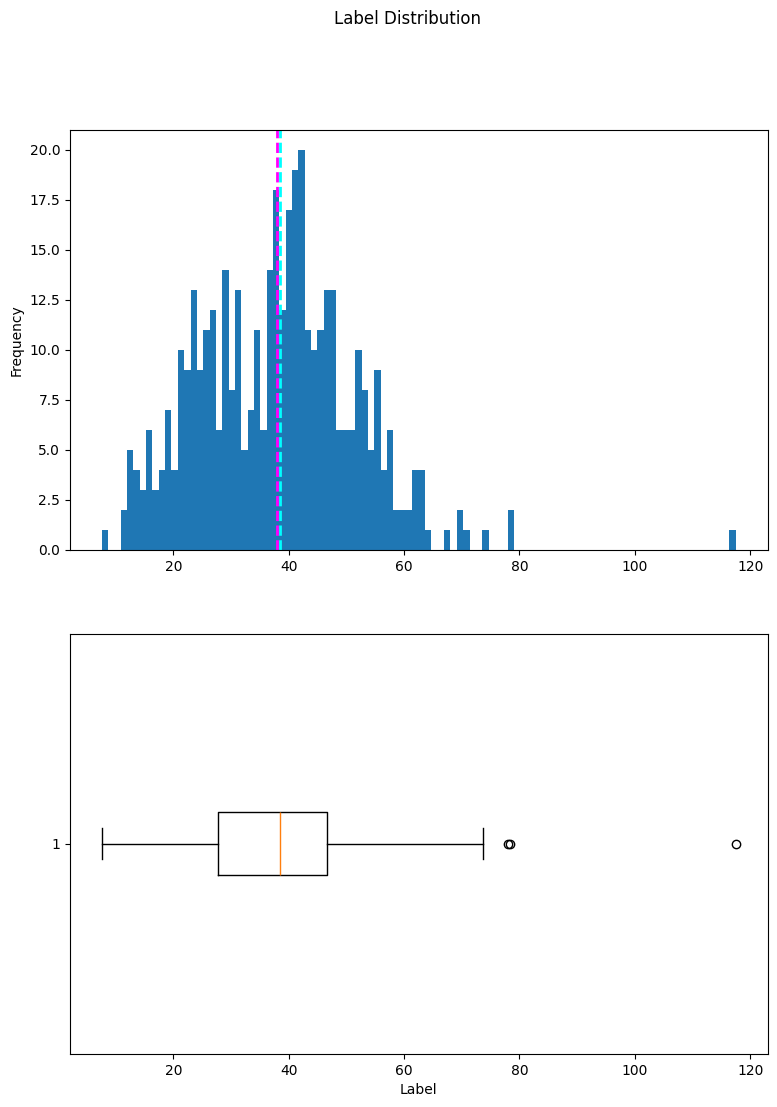

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Get the label column
label = data[data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
plt.show()

### Remove outliers


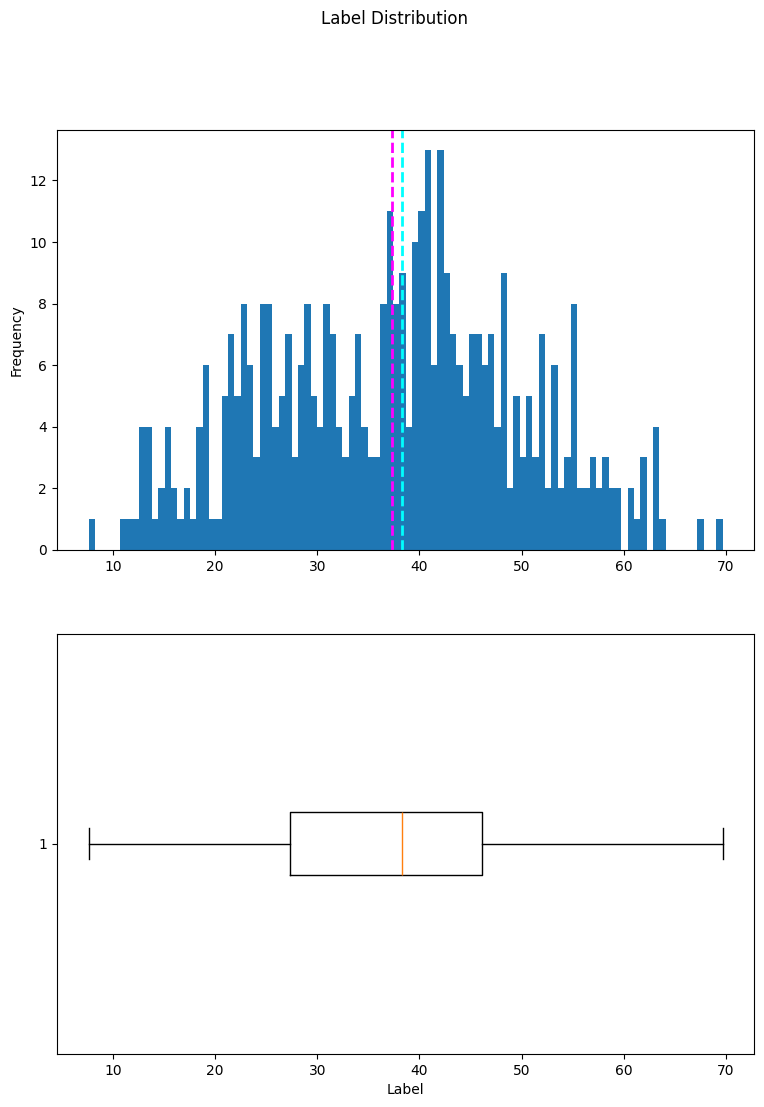

In [5]:
data = data[data['price_per_unit']<70]
# Get the label column
label = data[data.columns[-1]]

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
plt.show()

### View numeric correlations

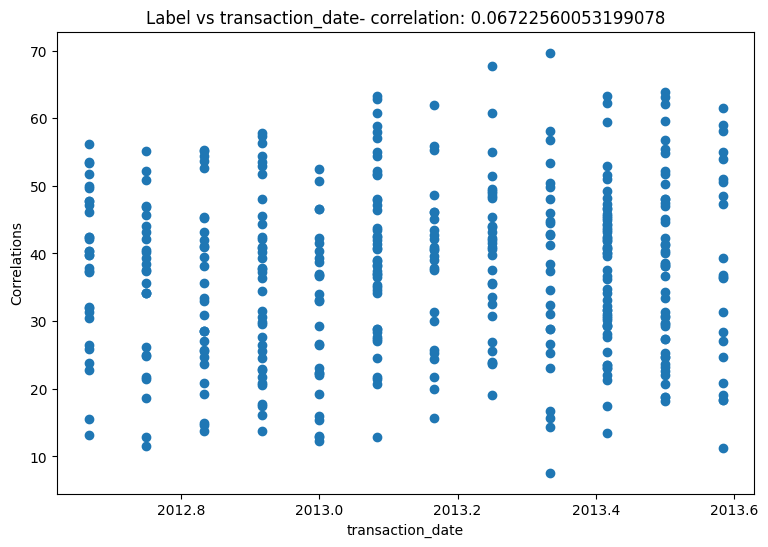

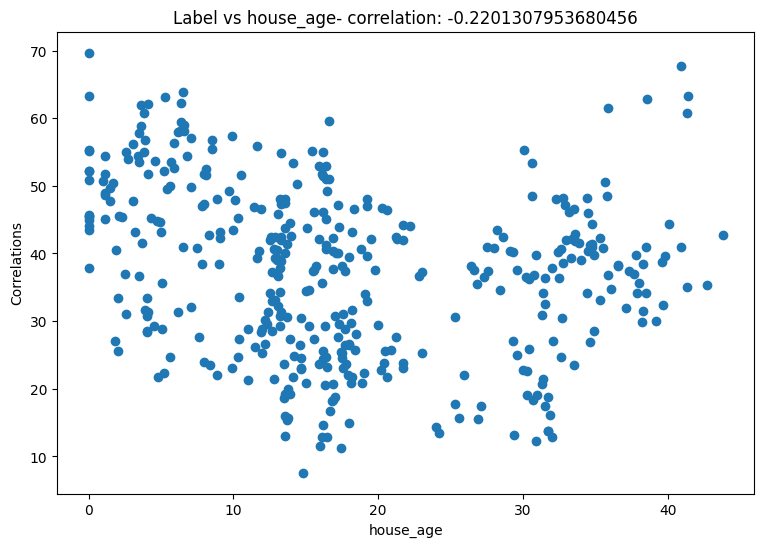

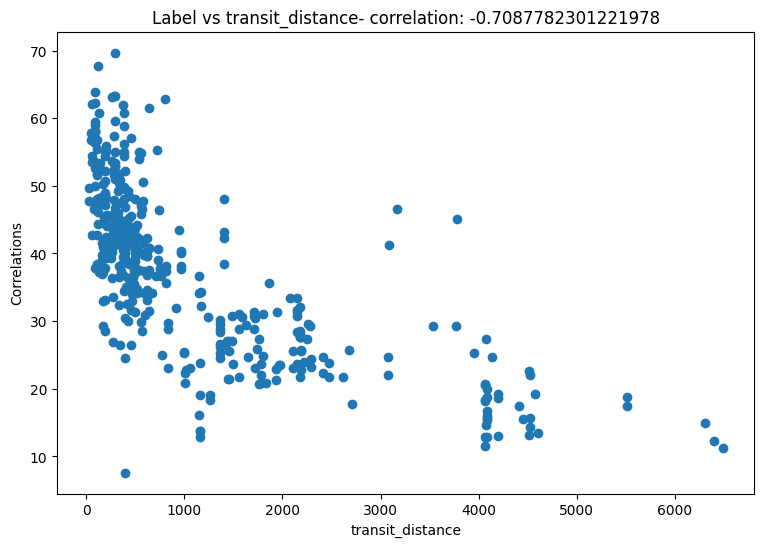

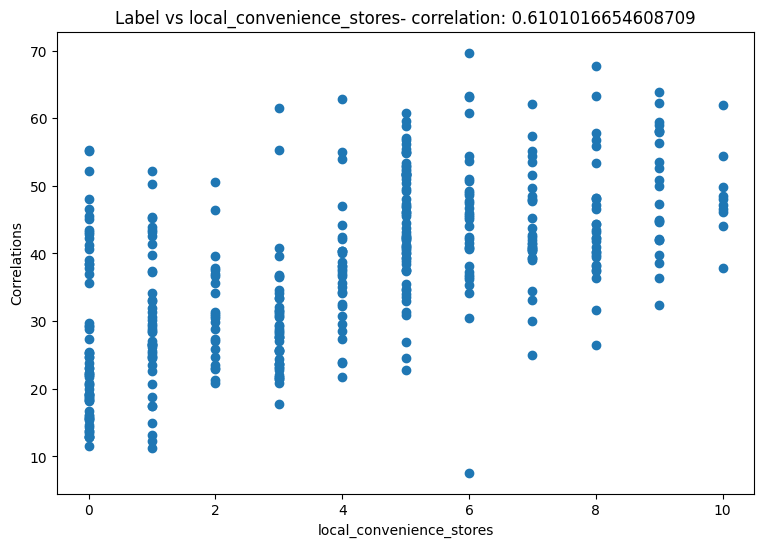

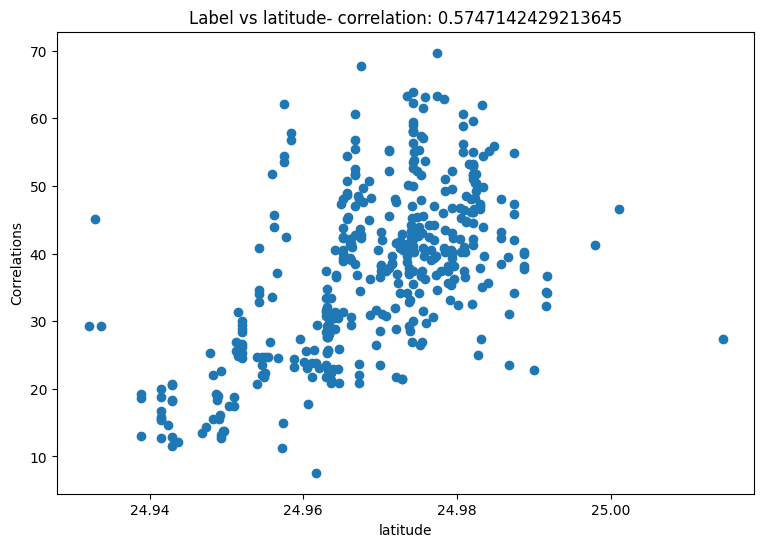

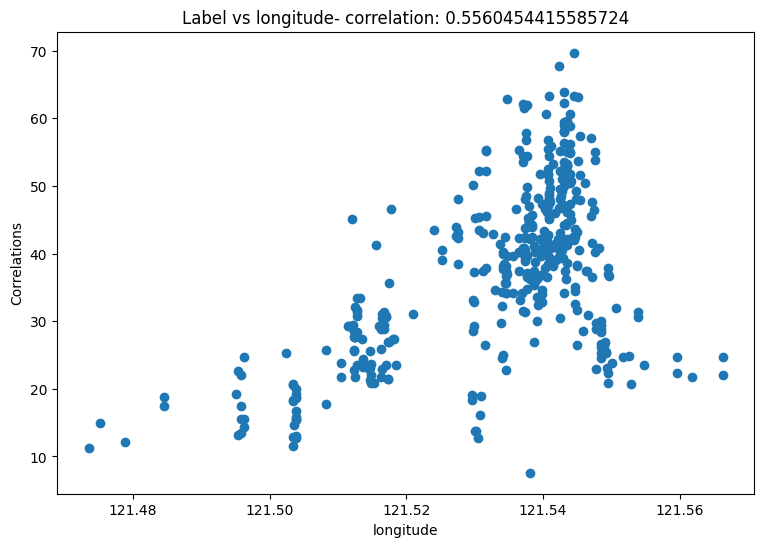

In [6]:
for col in data[data.columns[0:-1]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()

Label vs Transaction Date: Sparse and evenly distributed data points with a very low positive correlation, showing little to no relationship between transaction date and label.

Label vs House Age: A spread of data points with a slight negative correlation, hinting that newer houses may have a weak association with higher labels.

Label vs Transit Distance: Data points show a moderate negative correlation, indicating that greater transit distances might be associated with lower labels.

Label vs Local Convenience Stores: Dense clustering with a moderate positive correlation, suggesting that a higher number of convenience stores is likely associated with higher labels.

Label vs Latitude: Data points display a moderate positive correlation, indicating a potential association between higher latitudes and increased labels.

Label vs Longitude: Data points show a moderate positive correlation, suggesting that certain longitudes might be linked to higher labels.

#### Note: Given this analysis, the transaction date appears to be the least informative regarding the label (price per unit) and can be omitted

In [7]:
# deleting transaction_data column
data = data.drop(['transaction_date','price_per_unit'],axis = 1)

### Scaling the data

In [8]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the entire numeric data and transform it
data_scaled_array = scaler.fit_transform(data)

# Convert the scaled array back to a DataFrame with column names
data_scaled = pd.DataFrame(data_scaled_array, columns=data.columns)

# Replace the original dataframe with the scaled data in the original DataFrame
data= data_scaled
data

,house_age,transit_distance,local_convenience_stores,latitude,longitude
0,1.261566,-0.798567,2.022656,1.127979,0.454261
1,0.153481,-0.623427,1.681928,0.916018,0.406854
2,-0.396130,-0.421687,0.319015,1.487670,0.692593
3,-0.396130,-0.421687,0.319015,1.487670,0.692593
4,-1.131899,-0.557094,0.319015,0.838139,0.597780
...,...,...,...,...,...
403,-0.360671,2.358886,-1.384626,-2.198357,-1.911524
404,-1.078711,-0.794161,1.681928,0.433487,0.639991
405,0.091428,-0.556777,1.000471,0.826898,0.429583
406,-0.857093,-0.782822,0.319015,-0.175900,0.482185


### Checking Multicollinearity

In [9]:
# Create a DataFrame for the VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

# Display the VIF results
print(vif_data)

                    Feature       VIF
0                 house_age  1.013637
1          transit_distance  4.296650
2  local_convenience_stores  1.616140
3                  latitude  1.595742
4                 longitude  2.924911


We can see that there is no strong multicollinearity and vif score is below 5 which is acceptable.So, we move on with every features.

### Separing feature and label and Split train and test data

In [10]:
X = data[['house_age','transit_distance','local_convenience_stores','latitude','longitude']]
y = label
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.30, random_state = 0)

## Building different models and checking for the best accuracy

### Linear Regression

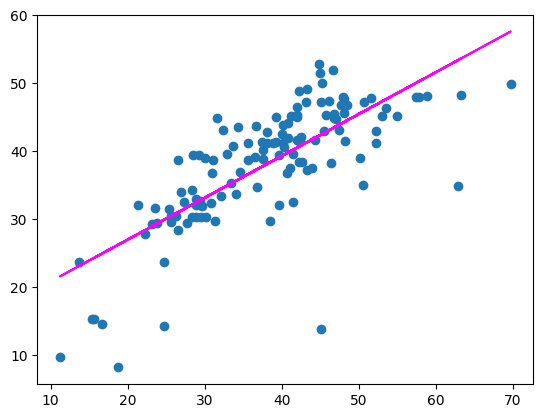

In [11]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

In [12]:
r2 = r2_score(y_test, predictions)
r2

0.551258587878821

The R-squared score of 0.55 indicates that the model explains 55% of the variability in the response data around its mean.

### Decision Tree Algorithm

In [13]:
model = DecisionTreeRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
r2

0.4919378415807856

### Ensemble Algorithm

In [14]:
model = RandomForestRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
r2

0.6942657486505859

In [15]:
model = GradientBoostingRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
r2

0.6802958490869595

In [16]:
model = xgb.XGBRegressor().fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test,predictions)
r2

0.5564039109725825

The R-squared score of 0.69 suggests that the Random Forest Regressor model explains approximately 69% of the variance in the test dataset which is the best score achieved than by other algorithms.

### Optimizing the Random Forest Model


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.7208167944917205


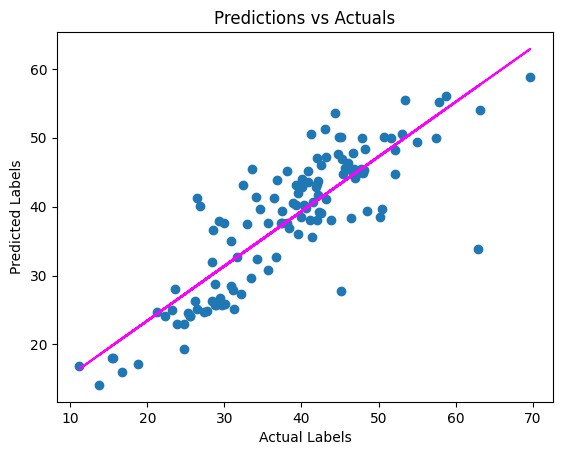

In [17]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  
}

# Create the Random Forest regressor
rf = RandomForestRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Use the best model for predictions
predictions = best_rf_model.predict(X_test)
r2 = r2_score(y_test,predictions)
print(r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

##### Model Accuracy increased from 69 to 72.

### Training the model with preprocessing steps

In [18]:
# Define preprocessing for numeric columns (scale them)
numeric_features =['house_age','transit_distance','local_convenience_stores','latitude','longitude']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train,y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['house_age',
                                                   'transit_distance',
                                                   'local_convenience_stores',
                                                   'latitude',
                                                   'longitude'])])),
                ('regressor', RandomForestRegressor())])


### Evaluate the model

0.7066385932044541


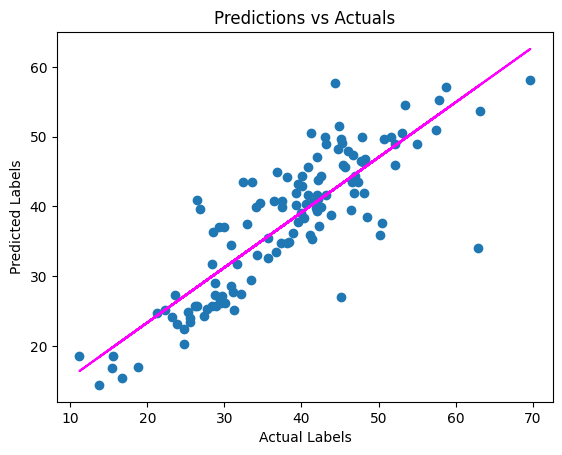

In [19]:
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(r2)
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Use the trained model

In [20]:
filename = './realestate.pkl'
joblib.dump(model,filename)

['./realestate.pkl']

In [21]:
# loading the model
loaded_model = joblib.load(filename)
x_new = pd.DataFrame({
    'transaction_date': [2013.167, 2013.000],
    'house_age': [16.2, 13.6],
    'transit_distance': [289.3248, 4082.015],
    'local_convenience_stores': [5, 0],
    'latitude': [24.98203, 24.94155],
    'longitude': [121.54348, 121.50381]
})
results = loaded_model.predict(x_new)
for prediction in results:
    print(np.round(prediction))

29.0
30.0
